In [48]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)

df=pd.read_csv('Melbourne_Housing.csv')

df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


In [49]:
df['Date']=pd.to_datetime(df['Date'], format='mixed', dayfirst=True)
df['Date']

0       2016-09-03
1       2016-09-03
2       2016-09-03
3       2016-09-03
4       2016-09-03
           ...    
27109   2017-09-30
27110   2017-09-30
27111   2017-09-30
27112   2017-09-30
27113   2017-09-30
Name: Date, Length: 27114, dtype: datetime64[ns]

In [50]:
df['BuildingArea'].unique()

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

In [51]:
df['BuildingArea'].apply(type).value_counts()

BuildingArea
<class 'float'>    16571
<class 'str'>      10543
Name: count, dtype: int64

In [52]:
df['BuildingArea']=df['BuildingArea'].replace(['missing','inf'],np.nan)
df['BuildingArea']=df['BuildingArea'].astype(float)
df['BuildingArea'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [53]:
new_df=pd.read_csv('Melbourne_Housing.csv',na_values=['missing','inf'])
new_df['Date']=pd.to_datetime(new_df['Date'],format='mixed',dayfirst=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [54]:
new_df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

In [55]:
new_df.duplicated().sum()

11

In [56]:
new_df.drop_duplicates(inplace=True)
new_df.reset_index(drop=True,inplace=True)
new_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Rooms,27103.000,2.992,1.000,2.000,3.000,4.000,16.000,0.955
Date,27103,2017-05-23 12:25:09.441759488,2016-01-28 00:00:00,2016-11-19 00:00:00,2017-07-08 00:00:00,2017-10-28 00:00:00,2018-03-17 00:00:00,NaN
Distance,27102.000,11.280,0.000,6.400,10.500,14.000,48.100,6.784
Postcode,27102.000,3113.787,3000.000,3046.000,3088.000,3153.000,3978.000,111.129
Bedroom,20678.000,3.046,0.000,2.000,3.000,4.000,20.000,0.955
Bathroom,20672.000,1.592,0.000,1.000,1.000,2.000,9.000,0.701
Car,20297.000,1.716,0.000,1.000,2.000,2.000,18.000,0.994
Landsize,17873.000,560.537,50.000,220.000,513.000,664.000,76000.000,1411.309
BuildingArea,10529.000,154.512,11.000,101.000,133.000,183.000,6791.000,130.584
YearBuilt,11985.000,1966.618,1850.000,1950.000,1970.000,2000.000,2019.000,36.042


In [57]:
new_df['Postcode'].nunique()

209

In [58]:
category_columns=['Suburb','Type','SellerG','Regionname']

for column in category_columns:
  print(new_df[column].value_counts())
  print("-"*20)

Suburb
Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: count, Length: 345, dtype: int64
--------------------
Type
h    18394
u     5882
t     2827
Name: count, dtype: int64
--------------------
SellerG
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: count, Length: 347, dtype: int64
--------------------
Regionname
Southern Metropolitan         8480
Northern Metropolitan         7809
Western Metropolitan          5792
Eastern Metropolitan          3264
South-Eastern Metropolitan    1336
Northern Victoria              165
Eastern Victoria               163
Western Victoria                94
Name:

In [59]:
df['Date']=pd.to_datetime(df['Date'],format='mixed',dayfirst=True)
df.info()
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

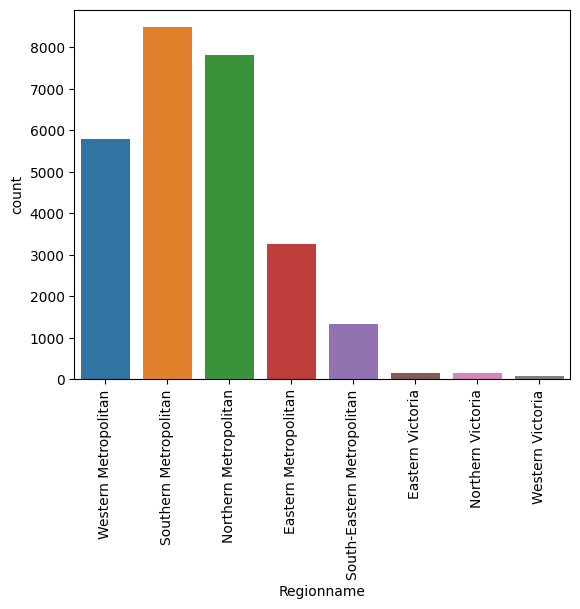

In [60]:
sb.countplot(data=df,x='Regionname')
plt.xticks(rotation=90)
plt.show()

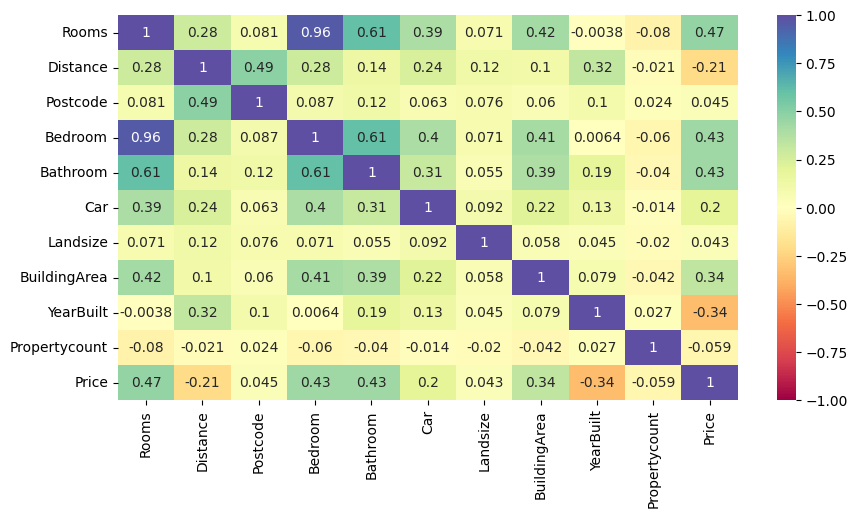

In [61]:
heat_df=df.select_dtypes(include=np.number).copy()
plt.figure(figsize=(10,5))
sb.heatmap(heat_df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [62]:
# plt.figure(figsize=(10,5))
# sb.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
# plt.show()

In [63]:
heat_df.corr()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Price
Rooms,1.000,0.284,0.081,0.959,0.609,0.394,0.071,0.418,-0.004,-0.080,0.465
Distance,0.284,1.000,0.490,0.283,0.140,0.245,0.118,0.102,0.321,-0.021,-0.211
Postcode,0.081,0.490,1.000,0.087,0.124,0.063,0.076,0.060,0.100,0.024,0.045
Bedroom,0.959,0.283,0.087,1.000,0.606,0.396,0.071,0.413,0.006,-0.060,0.430
Bathroom,0.609,0.140,0.124,0.606,1.000,0.306,0.055,0.389,0.187,-0.040,0.431
Car,0.394,0.245,0.063,0.396,0.306,1.000,0.092,0.218,0.133,-0.014,0.201
Landsize,0.071,0.118,0.076,0.071,0.055,0.092,1.000,0.058,0.045,-0.020,0.043
BuildingArea,0.418,0.102,0.060,0.413,0.389,0.218,0.058,1.000,0.079,-0.042,0.336
YearBuilt,-0.004,0.321,0.100,0.006,0.187,0.133,0.045,0.079,1.000,0.027,-0.340
Propertycount,-0.080,-0.021,0.024,-0.060,-0.040,-0.014,-0.020,-0.042,0.027,1.000,-0.059


<Axes: xlabel='Distance_binds', ylabel='Price'>

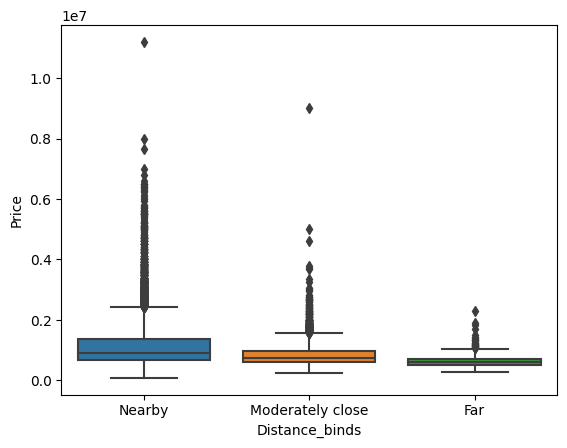

In [64]:
df['Distance_binds']=pd.cut(df['Distance'],bins=[0,15,30,50],labels=['Nearby','Moderately close','Far'],right=False)
sb.boxplot(data=df,x='Distance_binds',y='Price')

<Axes: xlabel='Distance_binds', ylabel='Price'>

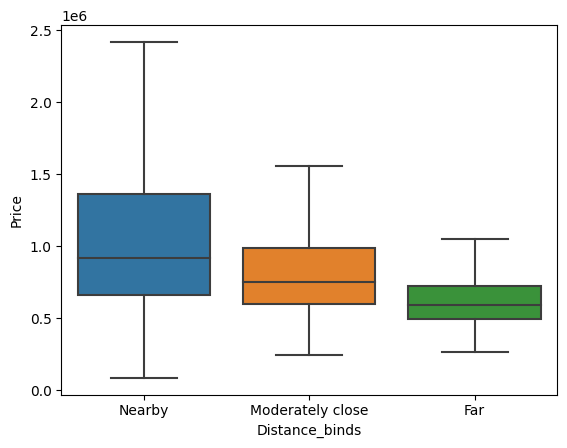

In [65]:
sb.boxplot(data=df,x='Distance_binds',y='Price',showfliers=False)


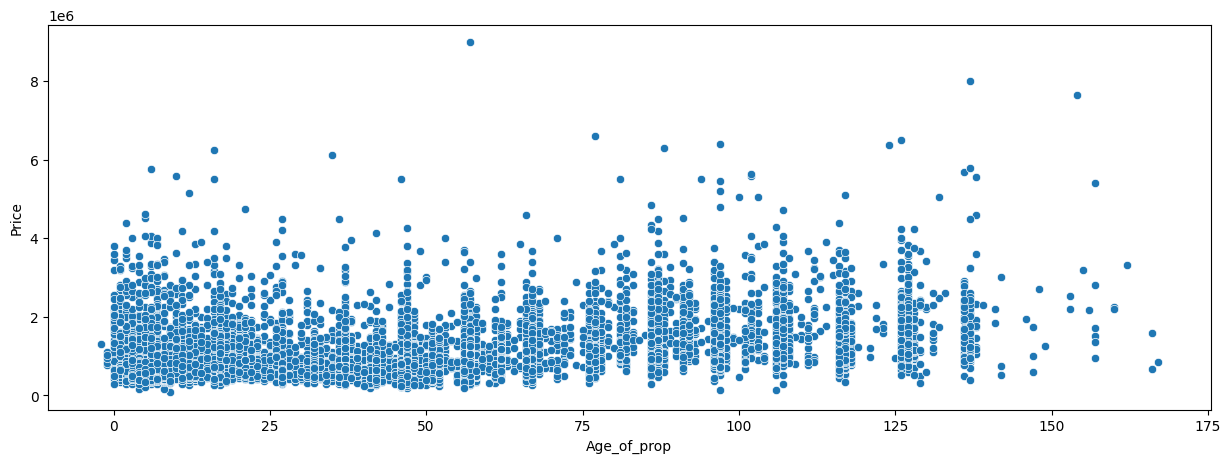

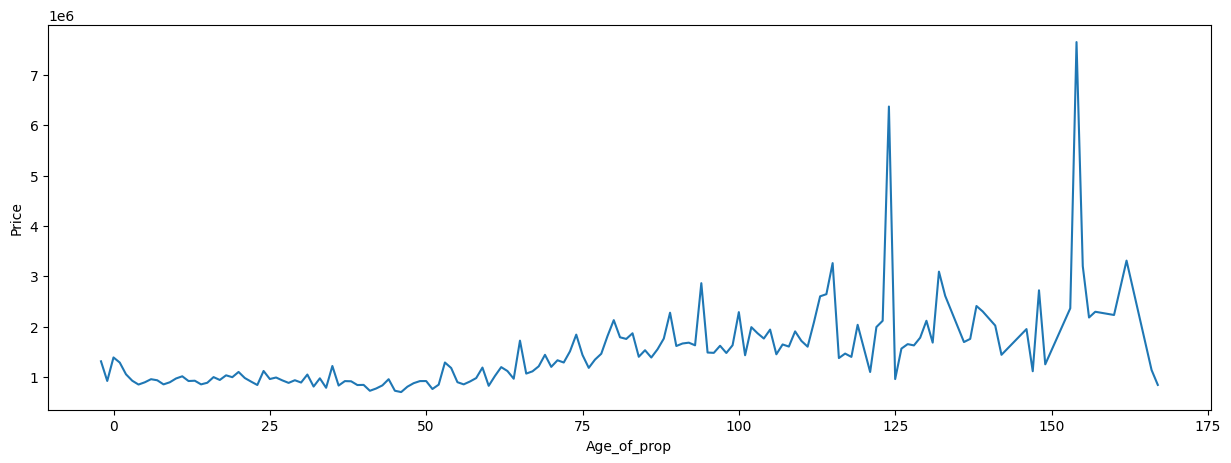

In [66]:
year_of_sale=df['Date'].dt.year
year_of_sale
df["Age_of_prop"]=year_of_sale-df['YearBuilt']

plt.figure(figsize=(15,5))
sb.scatterplot(data=df,x='Age_of_prop',y='Price');
plt.show()
plt.figure(figsize=(15,5))
sb.lineplot(data=df,x='Age_of_prop',y='Price',errorbar=None);
plt.show();

In [67]:
pd.DataFrame({"Null_values": df.isnull().sum()[df.isnull().sum()>0],"percentage":df.isnull().sum()[df.isnull().sum()>0]/df.shape[0]*100})

,Null_values,percentage
Distance,1,0.004
Postcode,1,0.004
Bedroom,6425,23.706
Bathroom,6431,23.728
Car,6806,25.112
Landsize,9230,34.055
BuildingArea,16574,61.152
YearBuilt,15118,55.780
Distance_binds,1,0.004
Age_of_prop,15118,55.780


In [68]:
null_value=df[df['Distance'].isnull()==True]

if not null_value.empty:
  df=df.drop(df[df['Distance'].isnull()==True].index[0]).reset_index(drop=True)

pd.DataFrame({"Null_values": df.isnull().sum()[df.isnull().sum()>0],"percentage":df.isnull().sum()[df.isnull().sum()>0]/df.shape[0]*100})

,Null_values,percentage
Bedroom,6424,23.703
Bathroom,6430,23.725
Car,6805,25.109
Landsize,9229,34.053
BuildingArea,16573,61.150
YearBuilt,15117,55.778
Age_of_prop,15117,55.778


In [69]:
df.loc[df['Bedroom'].isnull()==True,'Suburb'].value_counts(dropna=False)

Suburb
Reservoir          236
Bentleigh East     144
St Kilda           116
Glenroy            116
Richmond           111
                  ... 
Cranbourne East      1
Melton West          1
New Gisborne         1
Scoresby             1
Plenty               1
Name: count, Length: 307, dtype: int64

In [70]:
values=['Bedroom','Bathroom','Car']
df.groupby(['Regionname','Type'])[values].mean()

Bedroom  Bathroom   Car
Regionname                 Type                         
Eastern Metropolitan       h       3.552     1.807 1.946
                           t       3.032     1.853 1.673
                           u       2.357     1.263 1.290
Eastern Victoria           h       3.560     1.881 2.098
                           u       2.667     1.000 1.333
Northern Metropolitan      h       3.106     1.468 1.685
                           t       2.567     1.620 1.362
                           u       1.878     1.160 1.093
Northern Victoria          h       3.496     1.892 2.146
                           u       3.000     2.000 2.000
South-Eastern Metropolitan h       3.476     1.713 2.094
                           t       2.887     1.849 1.679
                           u       2.260     1.205 1.342
Southern Metropolitan      h       3.383     1.840 1.883
                           t       3.024     2.012 1.780
                           u       1.939     1.191 1.135
Western Metropolitan       h       3.244     1.576 1.907
                           t       2.880     1.851 1.538
                           u       2.106     1.192 1.144
Western Victoria           h       3.379     1.448 2.060

In [73]:
for value in values:
  df[value]=df[value].fillna(value=df.groupby(['Regionname','Type'])[value].transform('mean'))
  df[value]=df[value].astype(int)

df['Bathroom'].unique()

array([2, 1, 3, 4, 0, 5, 7, 8, 6, 9])

In [75]:
df.groupby(['Regionname','Type'])['Landsize'].median()

Regionname                  Type
Eastern Metropolitan        h      693.500
                            t      236.000
                            u      208.000
Eastern Victoria            h      840.000
                            u      230.000
Northern Metropolitan       h      482.000
                            t      145.000
                            u       50.000
Northern Victoria           h      737.500
                            u      315.000
South-Eastern Metropolitan  h      632.000
                            t      248.000
                            u      210.000
Southern Metropolitan       h      593.000
                            t      267.000
                            u       50.000
Western Metropolitan        h      537.000
                            t      200.000
                            u       80.000
Western Victoria            h      603.000
Name: Landsize, dtype: float64

In [83]:
df['Landsize']=df['Landsize'].fillna(value=df.groupby(['Regionname','Type'])['Landsize'].transform('median'))
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
BuildingArea,16573,61.150
YearBuilt,15117,55.778
Age_of_prop,15117,55.778


In [99]:
# df=df.drop(['BuildingArea','YearBuilt','Age_of_prop'],axis=1)
df=df.drop(['Age_of_prop'],axis=1)
df.to_csv('Mebourne_newData.csv',index=False)

In [103]:
df=pd.read_csv('Melbourne_noMissing.csv')

df.info()
# df.columns

for i,col in enumerate(df.columns):
  print(i,col)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27102 entries, 0 to 27101
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Suburb          27102 non-null  object 
 1   Rooms           27102 non-null  int64  
 2   Type            27102 non-null  object 
 3   SellerG         27102 non-null  object 
 4   Date            27102 non-null  object 
 5   Distance        27102 non-null  float64
 6   Postcode        27102 non-null  float64
 7   Bedroom         27102 non-null  int64  
 8   Bathroom        27102 non-null  int64  
 9   Car             27102 non-null  int64  
 10  Landsize        27102 non-null  float64
 11  Regionname      27102 non-null  object 
 12  Propertycount   27102 non-null  int64  
 13  Price           27102 non-null  int64  
 14  Distance_binds  27102 non-null  object 
 15  Age_of_prop     11985 non-null  float64
dtypes: float64(4), int64(6), object(6)
memory usage: 3.3+ MB
0 Suburb
1 Rooms
2 